# Experiments [1.4.0.1] [1.4.0.3] - Distribution of rationales probabilities by dataset

In [1]:
def param_default():
    return {
        'model': 'codeparrot',
        'datasets' : {
            'SG_BD' : 'code_completion_random_cut_5k_30_512_tokens', 
            'DC_SG_BD' : 'code_completion_docstring_random_cut_3.8k_30_150_tokens', 
            'DC_SG' : 'code_completion_docstring_signature_3.8k_30_150_tokens', 
            'DC': 'code_completion_docstring_5k_30_150_tokens'
        },
        'modality' : 'sc',
        ######## INPUT 
        'rational_results': '/workspaces/code-rationales/data/rationales/gpt',
        'sampling_results': '/workspaces/code-rationales/data/sampling/gpt',
        'tagged_rationales': '/workspaces/code-rationales/data/tagged_rationales/pure_code',
        'global_ast_results': '/workspaces/code-rationales/data/global_ast_results/gpt/pure_code',
        'grouping_results': '/workspaces/code-rationales/data/experiments/grouping_results', 
        ######## OUTPUT
        'rationales_distributions': '/workspaces/code-rationales/data/experiments/rationales_distributions',
        'num_experiments': 30,
        'num_samples': 100,
    }
    
params = param_default()

## Source Code

In [2]:
from pathlib import Path
import csv
import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import functools
import json
import os.path
from sklearn.preprocessing import StandardScaler

pd.options.display.float_format = '{:.2f}'.format

In [3]:
get_experiment_path =  lambda results_folder, dataset, exp: results_folder + '/' + dataset + '_exp_' + str(exp) +'.txt'

In [4]:
def load_ast_rationales_results(dataset_id: str) :
    experiment_paths = [get_experiment_path(params['global_ast_results'], params['datasets'][dataset_id], exp) for exp in range(params['num_experiments'])]
    experiment_results = []
    for experiment_path in experiment_paths:
        with open(experiment_path, 'r') as file:
            experiment_results.append(json.loads(file.read()))
    return experiment_results

In [5]:
def load_rationales_results(dataset_id: str, level: str) :
    file_path = params['grouping_results'] + '/' + params['model'] + '/' + params['modality'] + '/' + params['datasets'][dataset_id] + '_' + level + '.json'
    with open(file_path, 'r') as file:
        return json.loads(file.read())

In [6]:
def flat_rationales_probabilities(rationales_results):
    dataset_rationales_values = []
    for experiment_result in rationales_results:
        for target_key, target_values in experiment_result.items():
            for rational_key, rational_values in target_values.items():
                dataset_rationales_values = dataset_rationales_values + rational_values
    return dataset_rationales_values

In [7]:
def get_rationales_distribution(dataset_id: str, level: str, experiments: int):
    rationales_results = load_ast_rationales_results(dataset_id)[:experiments] if level == 'level_0' else load_rationales_results(dataset_id, level)[:experiments]
    dataset_rationales_values = flat_rationales_probabilities(rationales_results)
    return dataset_rationales_values

In [8]:
def create_df_rationales_distributions(level, exp):
    file_path = params['rationales_distributions'] + '/' + params['model'] + '/' + params['modality'] + '/' + level + '_exp_' + str(exp) + '.csv'
    if os.path.isfile(file_path):
          plot_data = pd.read_csv(file_path, index_col=[0])
          return plot_data

    rationales_distributions = {key: [] for key in params['datasets'].keys()}
    for dataset_id in params['datasets'].keys():
        rationales_distributions[dataset_id] = get_rationales_distribution(dataset_id, level, exp)

    group = []
    for dataset_id, distribution in rationales_distributions.items():
        group += [dataset_id]*len(distribution)
    plot_data = {
        'Values': np.concatenate(list(rationales_distributions.values())),
        'Dataset': group
    }
    plot_data = pd.DataFrame(plot_data)
    plot_data.to_csv(file_path)
    return plot_data


## Experiment 1.4.0.1
>Rationales distribution plots - Aggregation Level 0
>
>Only for first execution [exp_1]

In [9]:
df_rationales_distributions_level_0 = create_df_rationales_distributions('level_0',1)

/usr/local/lib/python3.8/dist-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


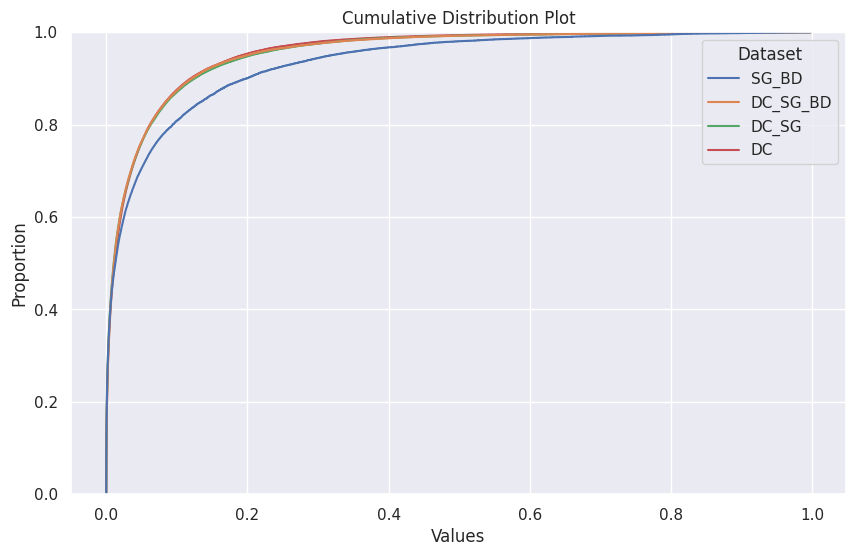

In [10]:
plt.figure(figsize=(10, 6))
sns.ecdfplot(data=df_rationales_distributions_level_0, x='Values', hue='Dataset', stat='proportion')
plt.title('Cumulative Distribution Plot')
plt.show()

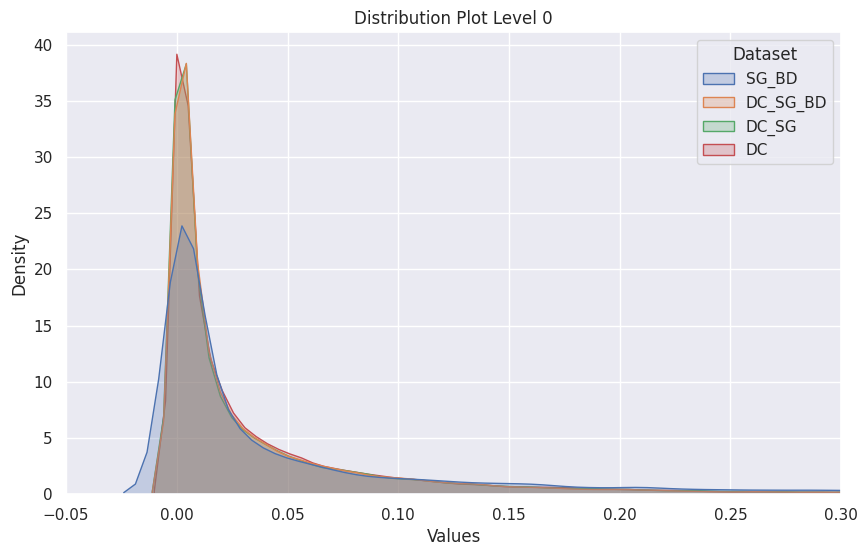

In [11]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_rationales_distributions_level_0, x='Values', hue='Dataset', common_norm=False, fill=True)
plt.title('Distribution Plot Level 0')
plt.xlim(-0.05,0.3)
plt.show()

In [12]:
pd.set_option('display.float_format', lambda x: '%7f' % x)
df_rationales_distributions_level_0[df_rationales_distributions_level_0['Dataset'] == 'DC'].describe()

,Values
count,9522999.000000
mean,0.043450
std,0.084811
min,0.000000
25%,0.001835
50%,0.011719
75%,0.046921
max,0.998042


## Experiment 1.4.0.3
>Rationales distribution plots - Aggregation Level 1

In [13]:
df_rationales_distributions_level_1 = create_df_rationales_distributions('level_1',1)

/usr/local/lib/python3.8/dist-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


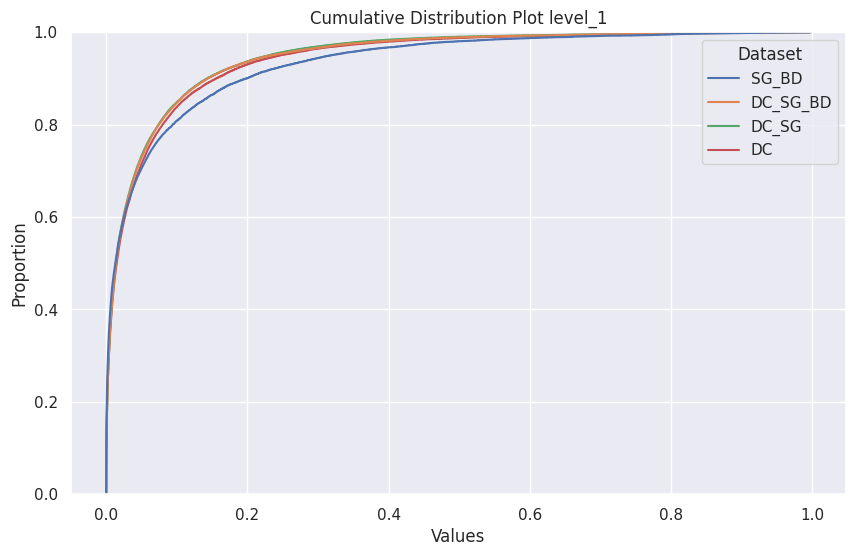

In [14]:
plt.figure(figsize=(10, 6))
sns.ecdfplot(data=df_rationales_distributions_level_1, x='Values', hue='Dataset', stat='proportion')
plt.title(f'Cumulative Distribution Plot level_1')
plt.show()

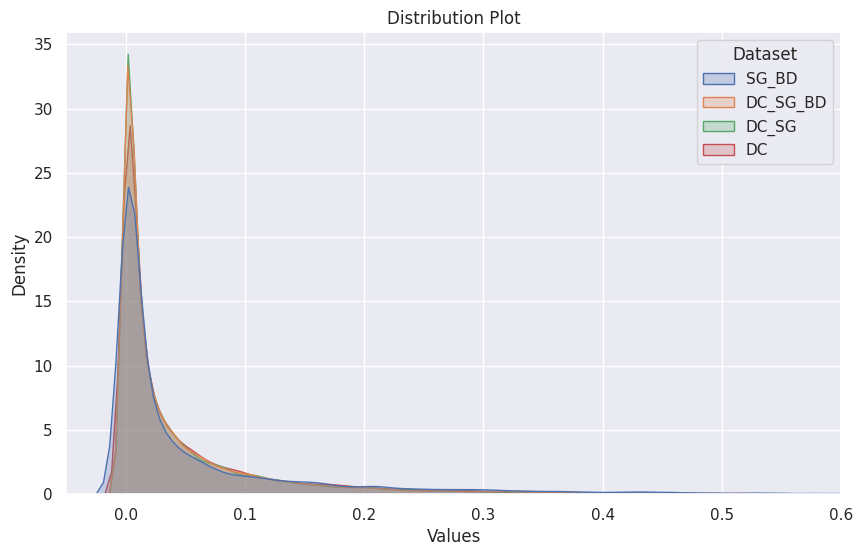

In [15]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_rationales_distributions_level_1, x='Values', hue='Dataset', common_norm=False, fill=True)
plt.title('Distribution Plot')
plt.xlim(-0.05,0.6)
plt.show()

In [16]:
pd.set_option('display.float_format', lambda x: '%7f' % x)
df_rationales_distributions_level_1[df_rationales_distributions_level_1['Dataset'] == 'DC'].describe()

,Values
count,2373368.000000
mean,0.055830
std,0.106637
min,0.000000
25%,0.002326
50%,0.014836
75%,0.060037
max,0.996612
